# 1 기본 세팅

# 1.1 라이브러리

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

# 1.2 데이터 불러오기: ID 추가된 데이터

In [2]:
data_adj = pd.read_csv("C:/Users/sec/.spyder-py3/DSL/credit_train_ver_2.csv")
print(data_adj.head())

     ID  Counts gender car reality  child_num  income_total  \
0  ID-0       5      F   N       N          0      202500.0   
1  ID-1       9      F   N       Y          1      247500.0   
2  ID-2       6      M   Y       Y          0      450000.0   
3  ID-3       2      F   N       Y          0      202500.0   
4  ID-4       1      F   Y       Y          0      157500.0   

            income_type                       edu_type     family_type  \
0  Commercial associate               Higher education         Married   
1  Commercial associate  Secondary / secondary special  Civil marriage   
2               Working               Higher education         Married   
3  Commercial associate  Secondary / secondary special         Married   
4         State servant               Higher education         Married   

            house_type  DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email  \
0  Municipal apartment      -13899          -4709           0      0      0   
1    House / apart

In [3]:
print(len(data_adj))

26457


In [4]:
print(data_adj['ID'].value_counts().sort_values())

ID-6735     1
ID-3654     1
ID-7946     1
ID-118      1
ID-2393     1
           ..
ID-284     20
ID-1492    21
ID-727     24
ID-385     24
ID-130     35
Name: ID, Length: 8759, dtype: int64


# 1.2 Days 변수들을 절대값으로 표현

In [5]:
#days

data_adj['DAYS_BIRTH'] = abs(data_adj['DAYS_BIRTH'])
data_adj['DAYS_EMPLOYED'] = abs(data_adj['DAYS_EMPLOYED'])
data_adj['begin_month'] = abs(data_adj['begin_month'])

In [6]:
print(data_adj['DAYS_EMPLOYED'].describe())

count    26457.000000
mean      2198.529538
std       2370.140530
min          0.000000
25%        407.000000
50%       1539.000000
75%       3153.000000
max      15713.000000
Name: DAYS_EMPLOYED, dtype: float64


# 1.3 Car와 Reality, gender 변수를 Dummy 변수로

In [7]:
#Car

data_adj.loc[data_adj['car'] == 'Y', 'car'] = float(1)
data_adj.loc[data_adj['car'] == 'N', 'car'] = float(0)
data_adj['car'] = pd.to_numeric(data_adj['car'])
print(data_adj['car'].describe())

#Reaility

data_adj.loc[data_adj['reality'] == 'Y', 'reality'] = float(1)
data_adj.loc[data_adj['reality'] == 'N', 'reality'] = float(0)
data_adj['reality'] = pd.to_numeric(data_adj['reality'])
print(data_adj['reality'].describe())

#Reaility

data_adj.loc[data_adj['gender'] == 'M', 'gender'] = float(1)
data_adj.loc[data_adj['gender'] == 'F', 'gender'] = float(0)
data_adj['gender'] = pd.to_numeric(data_adj['gender'])
print(data_adj['gender'].describe())


count    26457.000000
mean         0.379748
std          0.485333
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: car, dtype: float64
count    26457.000000
mean         0.673924
std          0.468784
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reality, dtype: float64
count    26457.000000
mean         0.331103
std          0.470619
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64


# 1.4 소득분위 변수 생성(10개분위, 4개분위)

In [38]:
#Income percentile

data_adj.loc[data_adj['income_total'] <= data_adj['income_total'].quantile(0.1), 'income_percentile'] = 1

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.1)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.2)), 'income_percentile'] = 2

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.2)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.3)), 'income_percentile'] = 3

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.3)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.4)), 'income_percentile'] = 4

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.4)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.5)), 'income_percentile'] = 5

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.5)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.6)), 'income_percentile'] = 6

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.6)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.7)), 'income_percentile'] = 7

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.7)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.8)), 'income_percentile'] = 8

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.8)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.9)), 'income_percentile'] = 9

data_adj.loc[data_adj['income_total'] > data_adj['income_total'].quantile(0.9), 'income_percentile'] = 10

print(data_adj['income_percentile'].describe())

#Income quantile

data_adj.loc[data_adj['income_total'] <= data_adj['income_total'].quantile(0.25), 'income_quantile'] = 1

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.25)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.5)), 'income_quantile'] = 2

data_adj.loc[(data_adj['income_total'] > data_adj['income_total'].quantile(0.5)) & 
         (data_adj['income_total'] <= data_adj['income_total'].quantile(0.75)), 'income_quantile'] = 3

data_adj.loc[data_adj['income_total'] > data_adj['income_total'].quantile(0.75), 'income_quantile'] = 4
             
print(data_adj['income_quantile'].describe())


count    26457.000000
mean         5.272329
std          2.941233
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: income_percentile, dtype: float64
count    26457.000000
mean         2.451941
std          1.089944
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: income_quantile, dtype: float64


# 1.5 ID별 평균 신용카드 연체율 변수: ID별 신용카드들의 연체율의 평균

In [9]:
ID_credit = pd.DataFrame(data_adj.groupby('ID')['credit'].mean())

In [10]:
print(ID_credit)

           credit
ID               
ID-0     1.600000
ID-1     0.555556
ID-10    2.000000
ID-100   2.000000
ID-1000  2.000000
...           ...
ID-995   1.000000
ID-996   2.000000
ID-997   1.000000
ID-998   2.000000
ID-999   2.000000

[8759 rows x 1 columns]


# 1.6 중복 ID 제거한 데이터프레임 생성

In [39]:
data_adj_unique = data_adj[['ID', 'Counts', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'income_percentile', 'income_quantile']]

In [40]:
data_adj_unique.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile
0,ID-0,5,0.0,0.0,0.0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,Commercial_associate_etc,2,7.0,3.0
1,ID-1,9,0.0,0.0,1.0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3,8.0,4.0
2,ID-2,6,1.0,1.0,1.0,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2,10.0,4.0
3,ID-3,2,0.0,0.0,1.0,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2,7.0,3.0
4,ID-4,1,0.0,1.0,1.0,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2,5.0,2.0


In [41]:
data_adj_unique = data_adj_unique.drop_duplicates()

In [42]:
len(data_adj_unique)

8759

In [43]:
data_adj_unique['ID']

0           ID-0
1           ID-1
2           ID-2
3           ID-3
4           ID-4
          ...   
26450    ID-8754
26453    ID-8755
26454    ID-8756
26455    ID-8757
26456    ID-8758
Name: ID, Length: 8759, dtype: object

In [44]:
data_adj_unique = pd.merge(data_adj_unique, ID_credit, left_on='ID', right_on='ID', how='inner')

In [45]:
data_adj_unique.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit
0,ID-0,5,0.0,0.0,0.0,0,202500.0,Commercial associate,Higher education,Married,...,13899,4709,0,0,0,Commercial_associate_etc,2,7.0,3.0,1.600000
1,ID-1,9,0.0,0.0,1.0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,11380,1540,0,0,1,Laborers,3,8.0,4.0,0.555556
2,ID-2,6,1.0,1.0,1.0,0,450000.0,Working,Higher education,Married,...,19087,4434,0,1,0,Managers,2,10.0,4.0,1.833333
3,ID-3,2,0.0,0.0,1.0,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,15088,2092,0,1,0,Sales staff,2,7.0,3.0,1.000000
4,ID-4,1,0.0,1.0,1.0,0,157500.0,State servant,Higher education,Married,...,15037,2105,0,0,0,Managers,2,5.0,2.0,2.000000


In [46]:
data_adj_unique['credit_avg'] = data_adj_unique['credit']
data_adj_unique = data_adj_unique.drop('credit', axis = 1)

In [47]:
data_adj_unique.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg
0,ID-0,5,0.0,0.0,0.0,0,202500.0,Commercial associate,Higher education,Married,...,13899,4709,0,0,0,Commercial_associate_etc,2,7.0,3.0,1.600000
1,ID-1,9,0.0,0.0,1.0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,11380,1540,0,0,1,Laborers,3,8.0,4.0,0.555556
2,ID-2,6,1.0,1.0,1.0,0,450000.0,Working,Higher education,Married,...,19087,4434,0,1,0,Managers,2,10.0,4.0,1.833333
3,ID-3,2,0.0,0.0,1.0,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,15088,2092,0,1,0,Sales staff,2,7.0,3.0,1.000000
4,ID-4,1,0.0,1.0,1.0,0,157500.0,State servant,Higher education,Married,...,15037,2105,0,0,0,Managers,2,5.0,2.0,2.000000


# 2 기술통계량 분석

# 2.1 소득분위별 신용수요: 저번주와 동일한 결과

# 2.1.1 소득분위별 주택보유현황: 특별한 경향 없음

Text(0.5, 1.0, 'Probability of owning house VS Income Percentile')

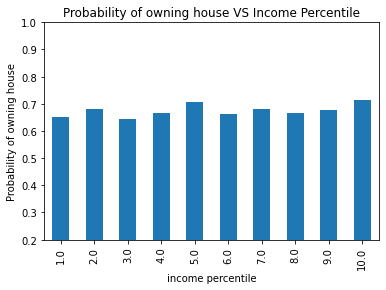

In [20]:
data_adj_unique.groupby('income_percentile')['reality'].mean().plot(kind = 'bar')
plt.ylim(0.2, 1)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning house')
plt.title('Probability of owning house VS Income Percentile')

(1.2, 1.8)

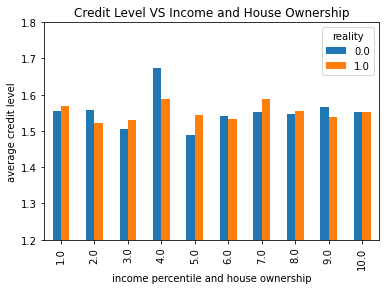

In [21]:
data_adj_unique.groupby(['income_percentile', 'reality'])['credit_avg'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and house ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and House Ownership')
plt.ylim(1.2,1.8)

(2.0, 4.0)

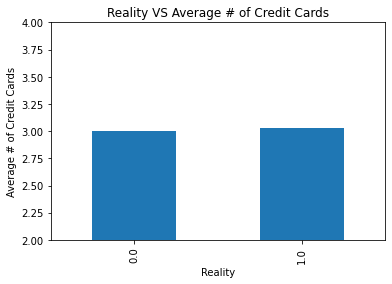

In [22]:
data_adj_unique.groupby('reality')['Counts'].mean().plot(kind = 'bar')
plt.xlabel('Reality')
plt.ylabel('Average # of Credit Cards')
plt.title('Reality VS Average # of Credit Cards')
plt.ylim(2, 4)

# 2.1.1 소결
(1) 소득분위와 부동산 소유 현황 간의 패턴이 없음.
-> 해석: 부동산은 필수재이므로 소득이 낮아도 부동산을 필요로 함 
(2) 신용카드 발급회수와 부동산 소유 현황 간의 패턴이 없음.
-> 해석: 부동산 소유 자체는 과소비 또는 신용과잉 행태와 무관함

# 2.1.2 소득분위별 자동차 소유 현황: 소득분위가 낮으면 자동차를 덜 소유함

Text(0.5, 1.0, 'Probability of owning car VS Income Percentile')

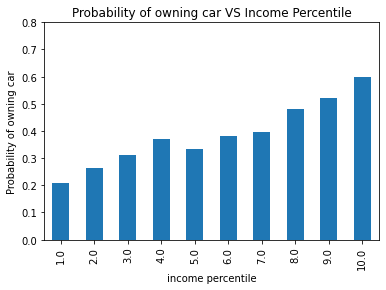

In [23]:
data_adj_unique.groupby('income_percentile')['car'].mean().plot(kind = 'bar')
plt.ylim(0, 0.8)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Probability of owning car VS Income Percentile')

Text(0.5, 1.0, 'Car VS Average Credit level')

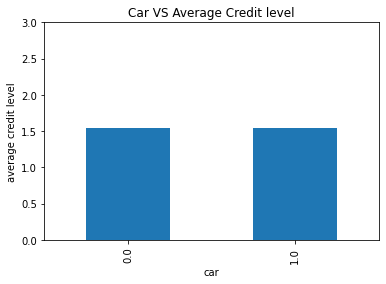

In [24]:
data_adj_unique.groupby('car')['credit_avg'].mean().plot(kind = 'bar')
plt.xlabel('car')
plt.ylabel('average credit level')
plt.ylim(0, 3)
plt.title('Car VS Average Credit level')

(1.0, 4.0)

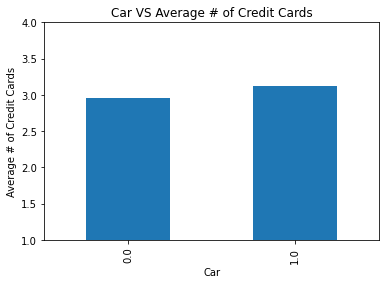

In [25]:
data_adj_unique.groupby('car')['Counts'].mean().plot(kind = 'bar')
plt.xlabel('Car')
plt.ylabel('Average # of Credit Cards')
plt.title('Car VS Average # of Credit Cards')
plt.ylim(1, 4)

(1.2, 1.8)

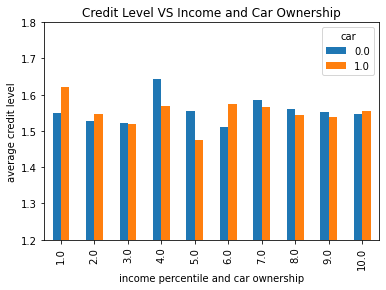

In [26]:
data_adj_unique.groupby(['income_percentile', 'car'])['credit_avg'].mean().unstack().plot(kind='bar')
plt.xlabel('income percentile and car ownership')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and Car Ownership')
plt.ylim(1.2,1.8)

# 2.1.2 소결
(1) 소득분위가 낮을수록 자동차를 덜 보유함
-> 자동차는 필수재 성격이 낮으므로, 소득수준이 낮으면 자동차를 덜 보유하는 것. 소득이 줄면 불필요한 신용 수요도 줄어든다는 결론
(2) 신용카드 연체 정도와 자동차 보유는 상관이 없음
-> 자동차를 보유하는 사람들은 대개 소득이 그만큼 높기 때문에, 자동차를 보유한다고 신용카드 연체가 늘어나지 않음
(3) 자동차를 보유한 사람들은 신용카드 발급회수가 더 많음
-> 자동차를 보유하는 사람들은 신용행태가 더 활발하므로 신용카드를 더 많이 발급
(4) 저번주에는 하위 소득분위에서 자동차 보유 시 연체정도가 높아지는 경향이 있었는데, 데이터 전처리 후 그런 경향이 사라짐??

# 2.2 신용카드 발급회수와 신용카드 연체

# 2.2.1 신용카드 발급회수의 히스토그램: 주로 1~2개

Text(0.5, 1.0, '<Histogram> # of Credit Cards')

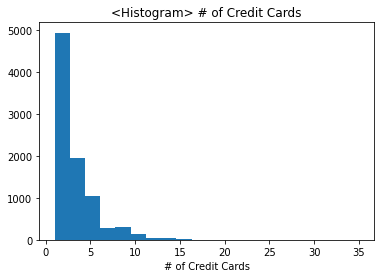

In [27]:
plt.hist(data_adj_unique['Counts'], bins = 20)
plt.xlabel('# of Credit Cards')
plt.title('<Histogram> # of Credit Cards')

# 2.2.2 신용카드 발급회수와 신용카드의 평균 연체율

Text(0.5, 1.0, 'Average Credit level VS # of Credit Cards')

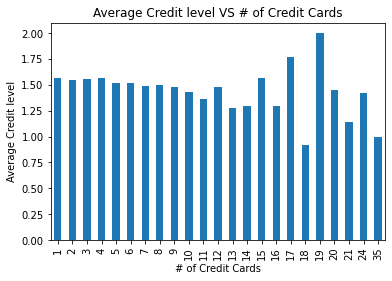

In [28]:
data_adj_unique.groupby('Counts')['credit_avg'].mean().plot(kind = 'bar')
plt.xlabel('# of Credit Cards')
plt.ylabel('Average Credit level')
plt.title('Average Credit level VS # of Credit Cards')

Text(0.5, 1.0, '# of Credit Cards VS Income')

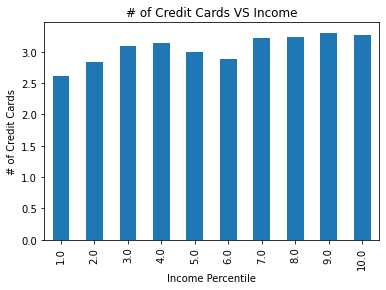

In [99]:
data_adj_unique.groupby('income_percentile')['Counts'].mean().plot(kind = 'bar')
plt.ylabel('# of Credit Cards')
plt.xlabel('Income Percentile')
plt.title('# of Credit Cards VS Income')

# 2.2 소결
(1) 신용카드 발급회수와 신용카드 평균 연체 정도는 무관함 혹은, 발급회수가 늘어날 수록 평균 연체 정도는 줄어듦
-> 신용카드를 많이 발급하는 사람들은 그만큼 소득이 받쳐주기 때문에 가능한 것.
-> 결국 소득이 줄어들면 그에 비례해서 신용수요가 줄어들기 때문에 소득 자체가 신용카드 연체와 무관하다는 기존 결론과 일관됨
(2) 소득이 높아지면 신용카드 발급회수가 늘어남.
-> (1)의 결론을 뒷받침하는 근거
(3) 아웃라이어 처리: 신용카드를 10개 이상 발급하는 경우는 뭔가 문제가 있음. 관측치 수도 많지 않으므로 제거도 고려했으면.

# 2.3. 자녀의 수: 특별한 경향 없음

In [49]:
data_adj_unique['child_num'].value_counts()

0     6144
1     1708
2      769
3      116
4       16
5        3
19       1
14       1
7        1
Name: child_num, dtype: int64

In [51]:
data_adj_unique.loc[data_adj_unique['child_num'] == 0, 'child_num_group'] = 0
data_adj_unique.loc[data_adj_unique['child_num'] == 1, 'child_num_group'] = 1
data_adj_unique.loc[data_adj_unique['child_num'] == 2, 'child_num_group'] = 2
data_adj_unique.loc[data_adj_unique['child_num'] >= 3, 'child_num_group'] = 3
print(data_adj_unique['child_num_group'].value_counts())

0.0    6144
1.0    1708
2.0     769
3.0     138
Name: child_num_group, dtype: int64


(2.0, 4.0)

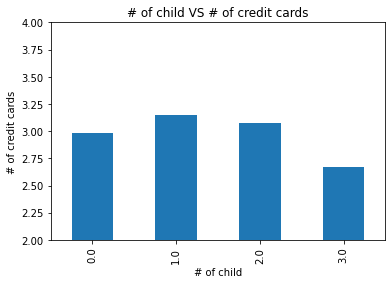

In [105]:
data_adj_unique.groupby('child_num_group')['Counts'].mean().plot(kind = 'bar')
plt.xlabel('# of child')
plt.ylabel('# of credit cards')
plt.title('# of child VS # of credit cards')
plt.ylim(2, 4)

(1.2, 1.8)

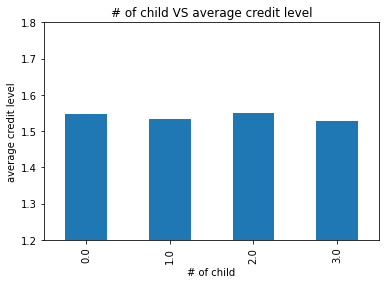

In [104]:
data_adj_unique.groupby('child_num_group')['credit_avg'].mean().plot(kind = 'bar')
plt.xlabel('# of child')
plt.ylabel('average credit level')
plt.title('# of child VS average credit level')
plt.ylim(1.2, 1.8)

(1.2, 1.9)

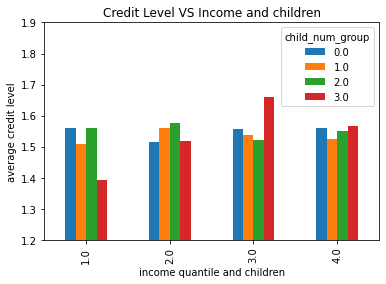

In [102]:
data_adj_unique.groupby(['income_quantile', 'child_num_group'])['credit_avg'].mean().unstack().plot(kind='bar', legend='None')
plt.xlabel('income quantile and children')
plt.ylabel('average credit level')
plt.title('Credit Level VS Income and children')
# plt.legend('',frameon=False)
plt.ylim(1.2, 1.9)

# 2.3 소결
(1) 자녀의 수와 신용카드 연체에는 상관이 없음
(2) 자녀의 수와 신용카드 발급회수에는 상관이 없음